# **WATER POTABILITY APP - DATA COLECTION**

## Objectives

* Fetch the water potability dataset from Kaggle and save it as raw data

* Perform initial data quality checks and basic cleaning

* Save the processed dataset for downstream analysis

## Inputs

*  Kaggle API credentials (kaggle.json)

* Water potability dataset (water_potability.csv from Kaggle)

## Outputs

* Raw dataset: data/water_potability.csv

* Processed dataset: data/water_potability_processed.csv

* Data quality report (printed in notebook)

## Additional Comments

* Requires Kaggle API setup

* Includes automatic missing value detection

* Performs basic outlier treatment using IQR method


---

# Import Packages

### Install Dependencies

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [16]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability\\water-potability'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [17]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [18]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability'

# Section 1

Section 1 content

# Import Packages

### Install Packages

In [4]:
!pip install kaggle pandas

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached setuptools-80.7.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached setuptools-80.7.1-py3-none-any.whl (1.2 MB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries and Setup Paths

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [20]:
import sys
print(sys.executable)

c:\Users\User\Downloads\water-potability\water-potability\.venv\Scripts\python.exe


## Data Loading

In [21]:
import pandas as pd
import os
from pathlib import Path

print("Current working directory:", os.getcwd())

possible_paths = [
    "../data/water_potability.csv",
    "./data/water_potability.csv",
    "water_potability.csv",
    str(Path.home() / "data/water_potability.csv")
]

df = None
found_path = None

for path in possible_paths:
    try:
        if os.path.exists(path):
            df = pd.read_csv(path)
            found_path = path
            print(f"Success! Found dataset at: {path}")
            break
    except Exception as e:
        print(f"Attempt failed for {path}: {str(e)}")

if df is not None:
    print(f"\nDataset shape: {df.shape}")
    display(df.head())
else:
    print("\nERROR: Could not load dataset. Please:")
    print("1. Check if the file exists in any of these locations:")
    for path in possible_paths:
        print(f"   - {path}")
    print("2. Verify the file name is exactly 'water_potability.csv'")
    print("3. Check file permissions (try downloading again from Kaggle)")
    
    df = pd.DataFrame()

Current working directory: c:\Users\User\Downloads\water-potability
Success! Found dataset at: ../data/water_potability.csv

Dataset shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Initial Data Exploration

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Statistical Summary:
Missing Values Summary:


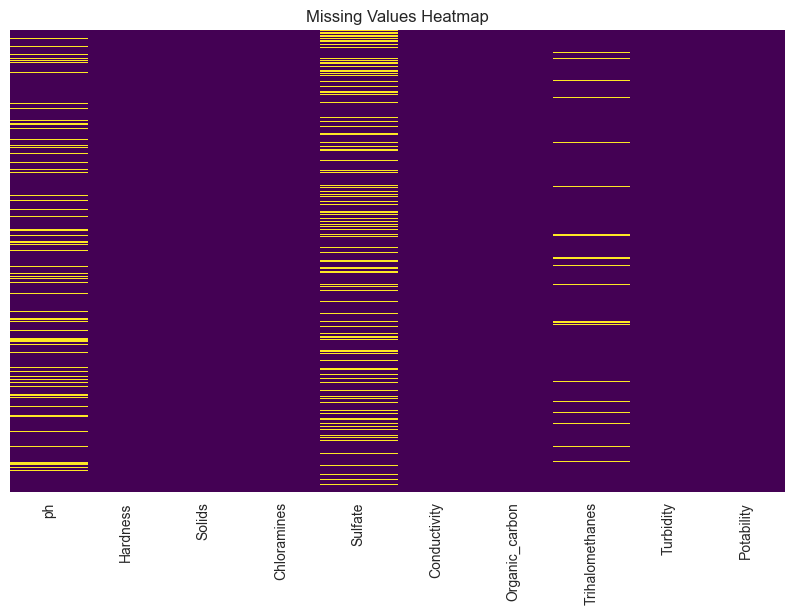

In [ ]:
print("Dataset Information:")
df.info()

print("\nStatistical Summary:")
df.describe()

missing_values = df.isna().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
}).sort_values(by='Missing Values', ascending=False)

print("Missing Values Summary:")
missing_data

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## Target Variable Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_39244\772115324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='Set2')


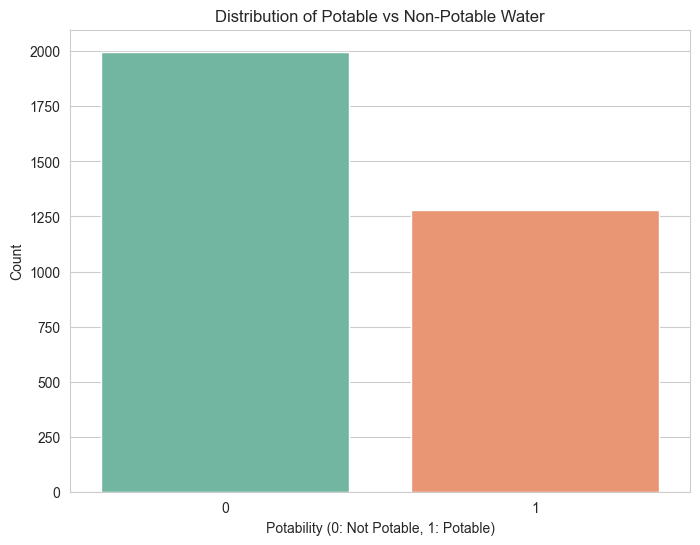

Class Balance (%):


Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df, palette='Set2')
plt.title('Distribution of Potable vs Non-Potable Water')
plt.xlabel('Potability (0: Not Potable, 1: Potable)')
plt.ylabel('Count')
plt.show()

class_balance = df['Potability'].value_counts(normalize=True) * 100
print("Class Balance (%):")
class_balance

## Feature Analysis

Features to analyze: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


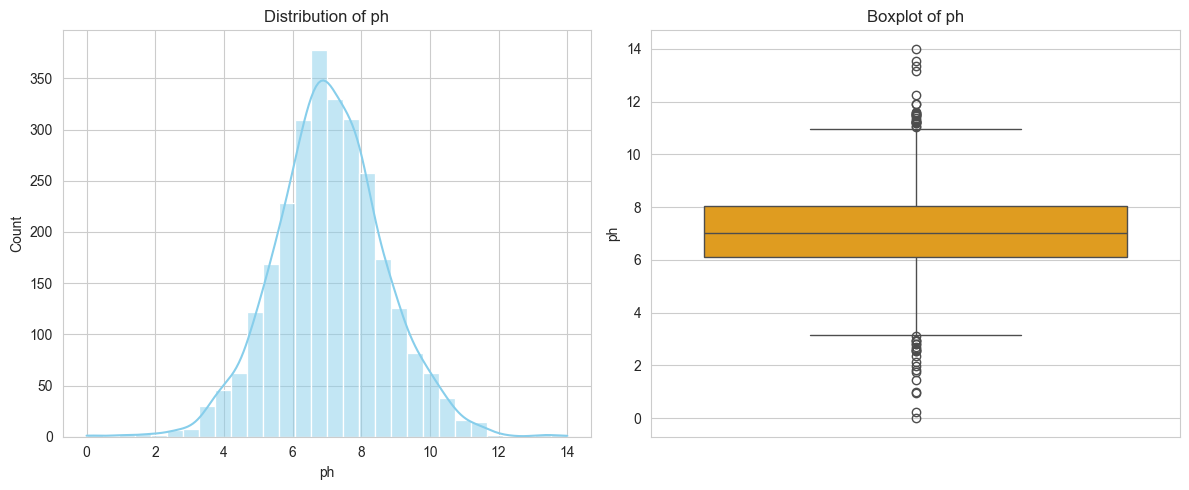

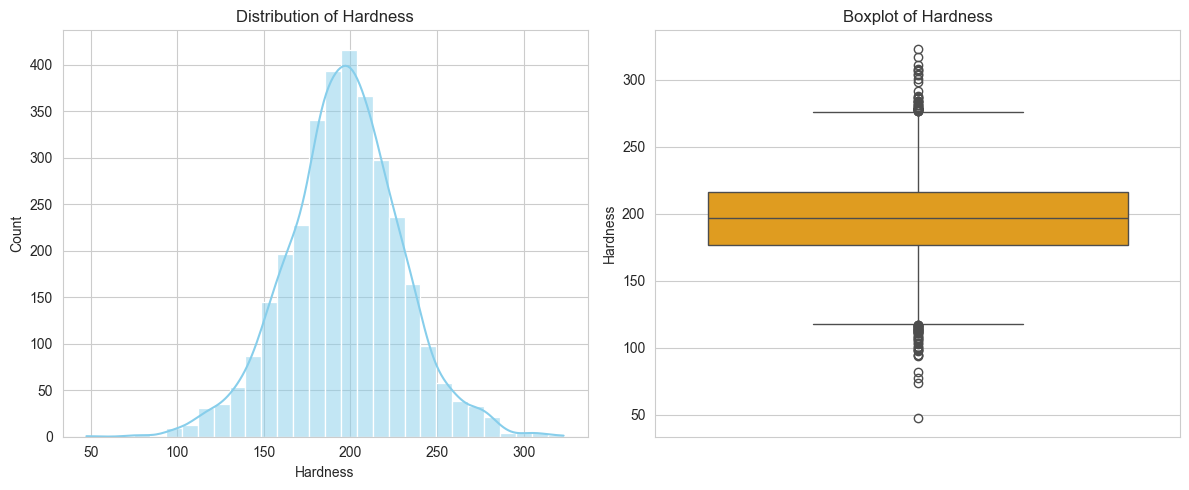

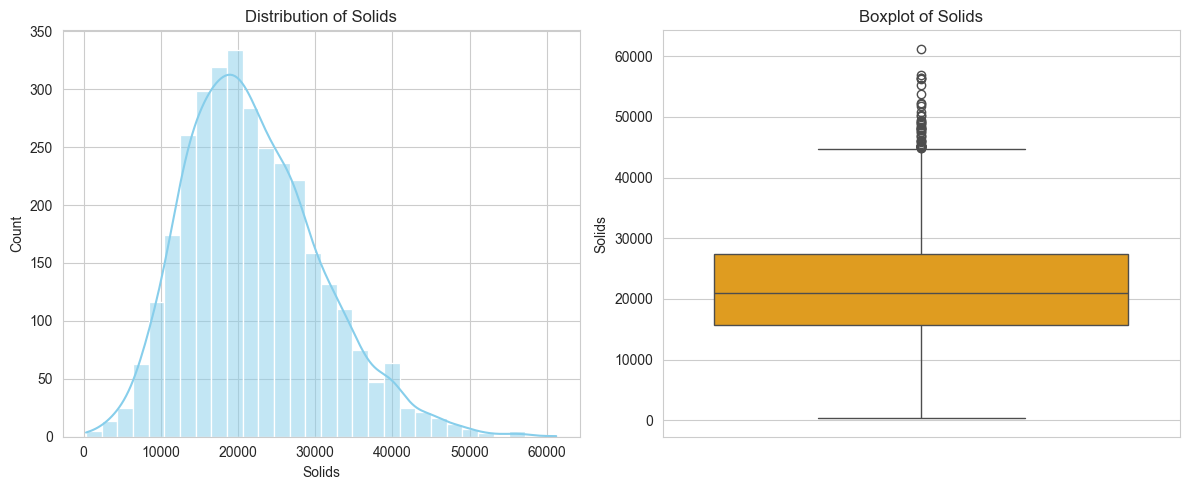

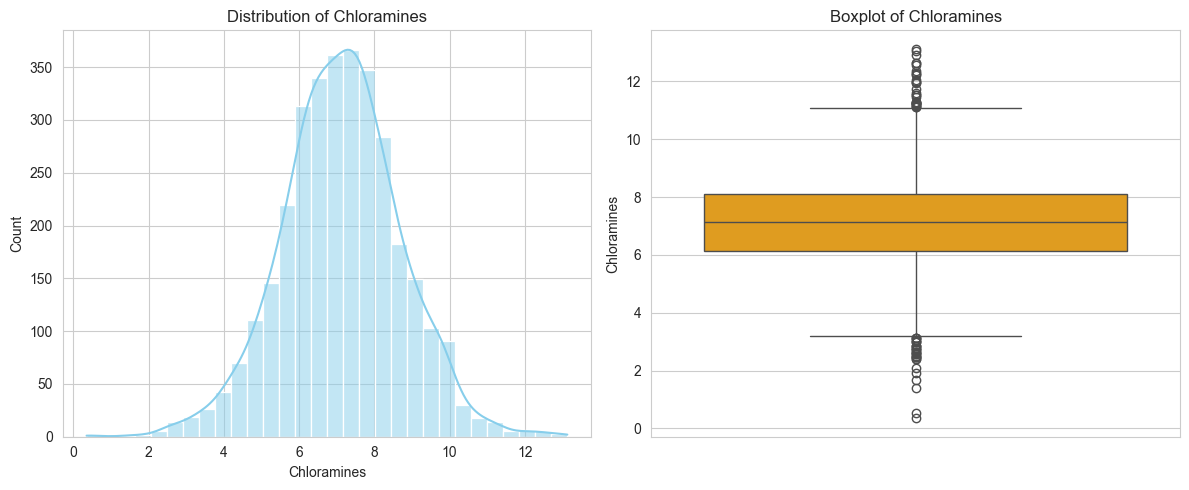

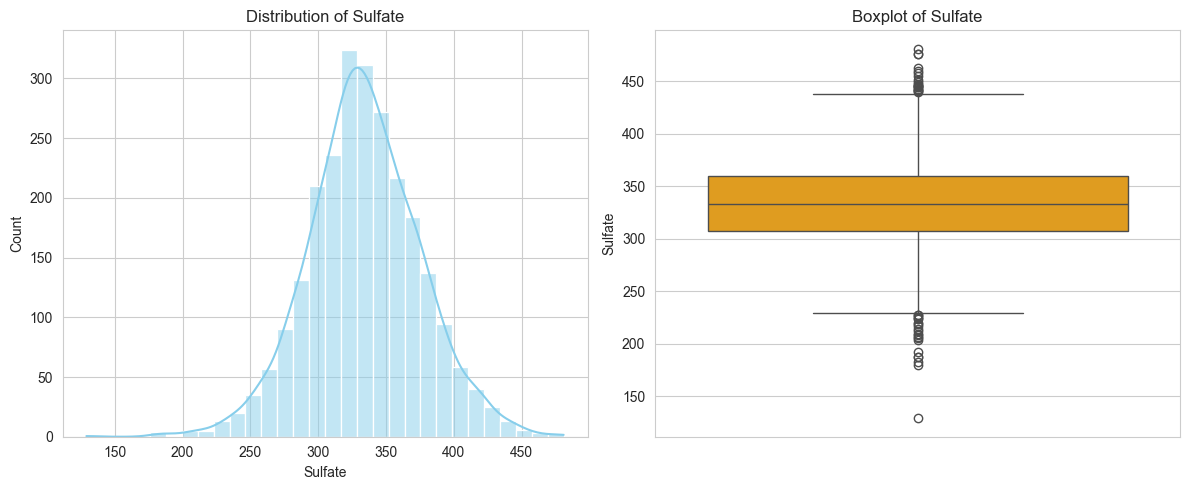

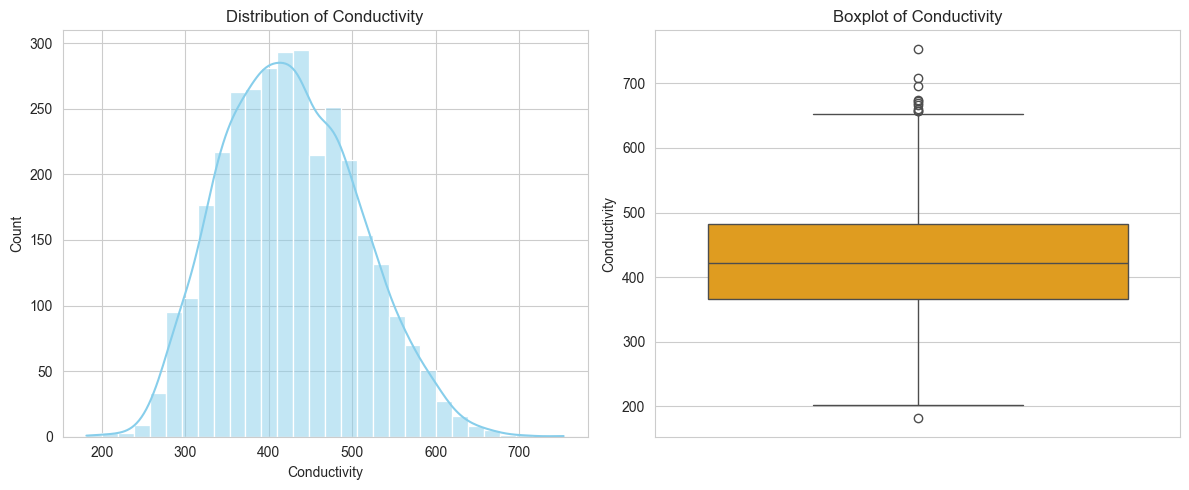

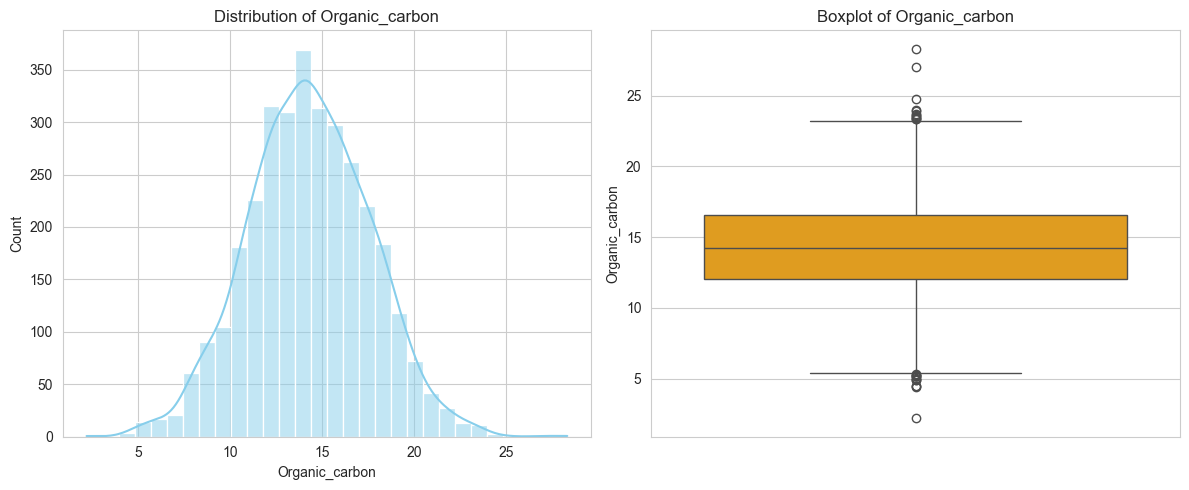

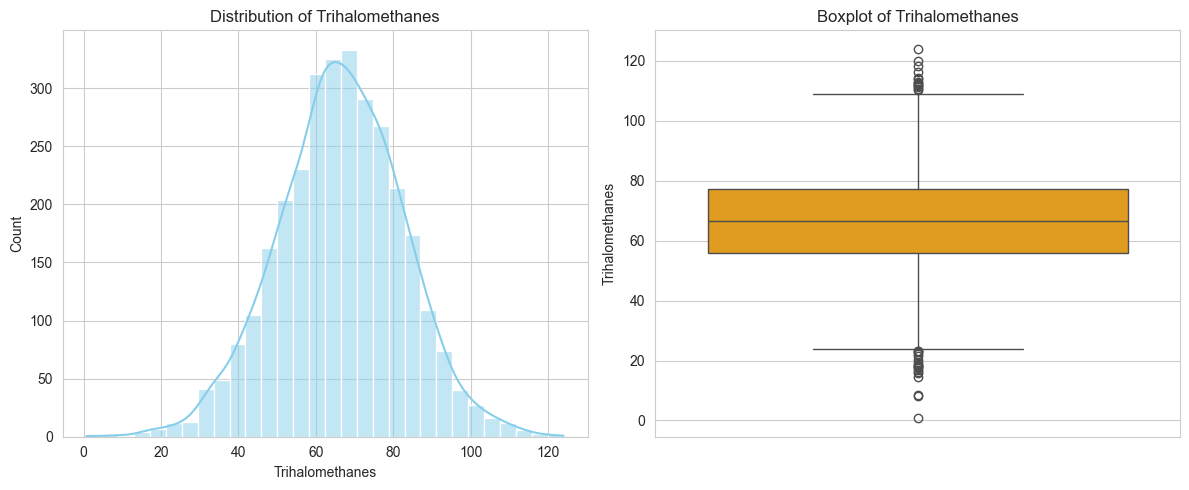

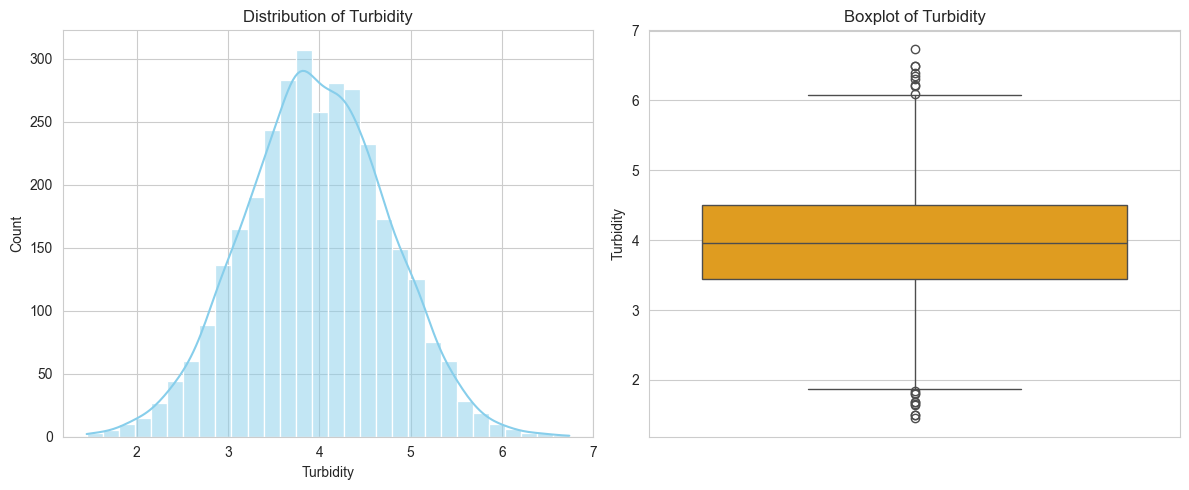

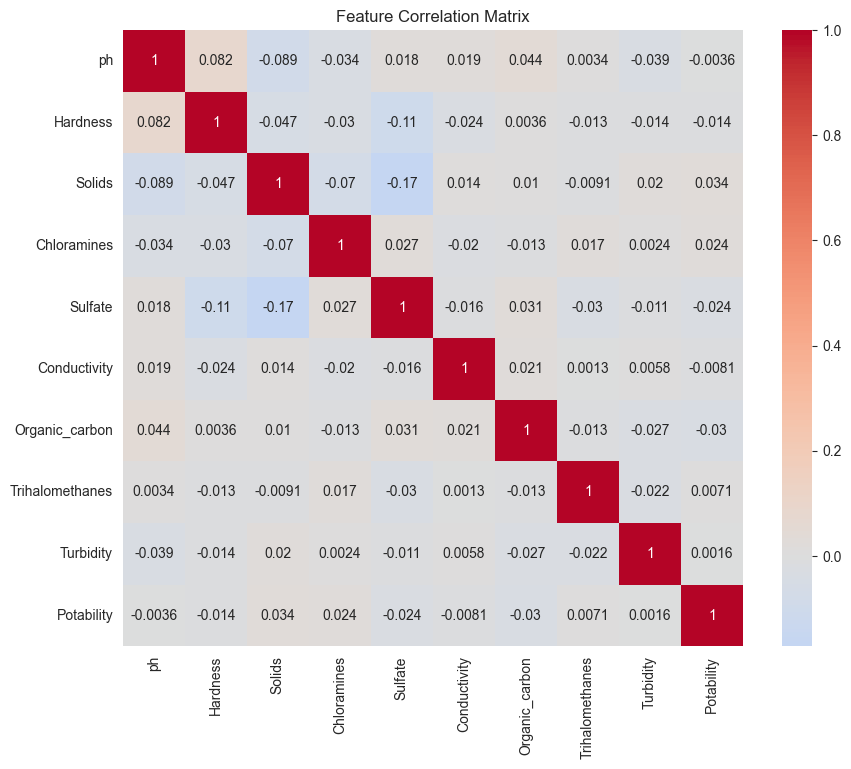

In [ ]:
features = df.columns[:-1]
print("Features to analyze:", list(features))

for feature in features:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

processed_df = df.copy()
print("Original shape:", processed_df.shape)

for col in processed_df.columns:
    if processed_df[col].isna().sum() > 0:
        processed_df[col].fillna(processed_df[col].median(), inplace=True)

print("Missing values after treatment:", processed_df.isna().sum().sum())

features = processed_df.columns.drop("Potability")

for col in features:
    Q1 = processed_df[col].quantile(0.25)
    Q3 = processed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    processed_df[col] = np.where(
        processed_df[col] < lower_bound, lower_bound, processed_df[col]
    )
    processed_df[col] = np.where(
        processed_df[col] > upper_bound, upper_bound, processed_df[col]
    )

print("Outliers treated using IQR method")

scaler = StandardScaler()
X = processed_df.drop('Potability', axis=1)
y = processed_df['Potability']

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

processed_df = pd.concat([X_scaled, y], axis=1)

print("\nProcessed Data Summary:")
print(processed_df.describe())

Original shape: (3276, 10)
Missing values after treatment: 0
Outliers treated using IQR method

Processed Data Summary:
                 ph      Hardness        Solids   Chloramines       Sulfate  \
count  3.276000e+03  3.276000e+03  3.276000e+03  3.276000e+03  3.276000e+03   
mean  -2.505119e-16 -1.648390e-16 -2.163512e-16 -2.776235e-16  7.287618e-16   
std    1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00   
min   -2.304373e+00 -2.476150e+00 -2.518320e+00 -2.575035e+00 -2.092368e+00   
25%   -5.758145e-01 -6.104492e-01 -7.321673e-01 -6.440698e-01 -5.202839e-01   
50%   -2.648354e-02  1.796822e-02 -1.198018e-01  5.508795e-03 -1.724307e-02   
75%    5.765577e-01  6.333513e-01  6.256933e-01  6.432406e-01  5.277722e-01   
max    2.305116e+00  2.499052e+00  2.662484e+00  2.574206e+00  2.099856e+00   

       Conductivity  Organic_carbon  Trihalomethanes     Turbidity  \
count  3.276000e+03    3.276000e+03     3.276000e+03  3.276000e+03   
mean  -9.353527e-16    2.060

## Initial Modeling (Quick Test)

Training set: 2620 samples
Test set: 656 samples
Model Evaluation:
Accuracy: 0.6585365853658537

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.62      0.31      0.42       256

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.63       656



C:\Users\User\AppData\Local\Temp\ipykernel_39244\589134868.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


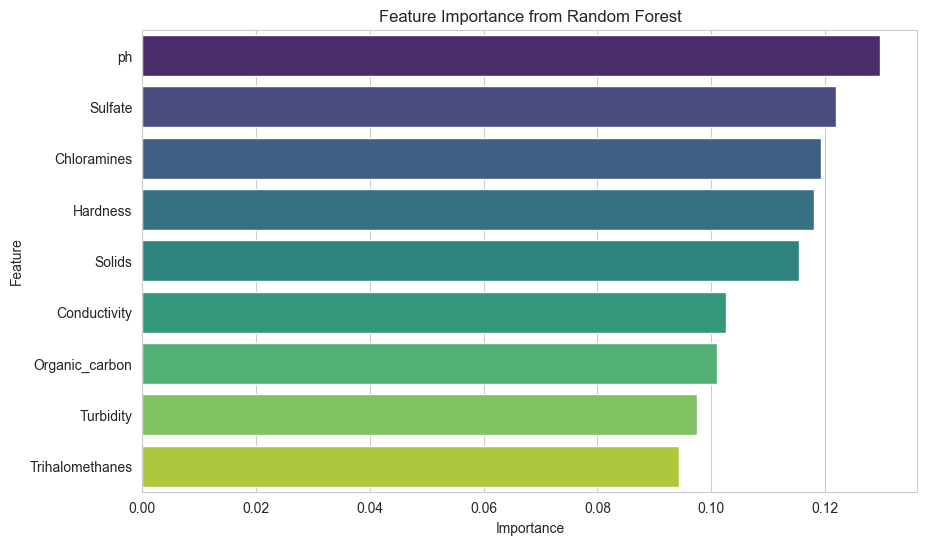

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

## Save Dataset

In [28]:
import pandas as pd
from pathlib import Path
import os

data_dir = Path("./data")
output_filename = "water_potability_processed.csv"
output_path = data_dir / output_filename

data_dir.mkdir(parents=True, exist_ok=True)

try:
    if 'df' in globals() and isinstance(df, pd.DataFrame) and not df.empty:
        df.to_csv(output_path, index=False)
        
        if os.path.exists(output_path):
            print(f"✅ Dataset successfully saved to:\n{output_path}")
            print(f"File size: {os.path.getsize(output_path)/1024:.2f} KB")
        else:
            raise FileNotFoundError("File was not created")
    else:
        raise ValueError("No valid DataFrame available to save")
        
except Exception as e:
    print(f"❌ Error saving dataset: {str(e)}")
    print("Troubleshooting steps:")
    print(f"1. Check directory permissions for: {data_dir}")
    print("2. Verify disk space is available")
    print("3. Ensure DataFrame exists and is not empty")

✅ Dataset successfully saved to:
data\water_potability_processed.csv
File size: 509.53 KB


In [29]:
import os

print("\n🛠️ Diagnostic Information:")
print(f"Current working directory: {os.getcwd()}")
print(f"Absolute path to saved file: {os.path.abspath(output_path)}")

print("\nContents of data directory:")
try:
    print(os.listdir(data_dir))
except FileNotFoundError:
    print("Data directory not found at:", os.path.abspath(data_dir))


🛠️ Diagnostic Information:
Current working directory: c:\Users\User\Downloads\water-potability
Absolute path to saved file: c:\Users\User\Downloads\water-potability\data\water_potability_processed.csv

Contents of data directory:
['water_potability.csv', 'water_potability_processed.csv']


---

# Section 2

---

NOTE

The dataset is now saved in data/water_potability.csv.
We used load_and_preprocess_data to ensure consistency with the app's preprocessing pipeline.
Next steps: Explore the dataset in jupyter_notebooks/EDA_Analysis.ipynb.

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

## Push Generated/new files from this section to your Github Repo

## gitignore

core.Microsoft*

core.mongo*

core.python*

env.py

__pycache__/

*.py[cod]

node_modules/

.github/

cloudinary_python.txt

kaggle.json

.venv/

In [30]:
import os

output_dir = 'outputs'

try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"✅ Output directory '{output_dir}' is ready for use.")
except Exception as e:
    print(f"❌ Failed to create output directory: {e}")

✅ Output directory 'outputs' is ready for use.
